<a href="https://colab.research.google.com/github/DaffaPmgks/Klasifikasi-Jenis-Obat/blob/main/UAS_BIGDATA_MINING_5728.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# **Reading Data Set**

In [ ]:
df_drug = pd.read_csv("/content/drive/MyDrive/DATASET UAS BIGDATA MINING/drug200.csv")

In [ ]:
df_drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
print(df_drug.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


# **Initial Dataset Exploration**

In [ ]:
df_drug.Drug.value_counts()

,count
Drug,
DrugY,91
drugX,54
drugA,23
drugC,16
drugB,16


In [ ]:
df_drug.Sex.value_counts()

,count
Sex,
M,104
F,96


In [ ]:
df_drug.BP.value_counts()

,count
BP,
HIGH,77
LOW,64
NORMAL,59


In [ ]:
df_drug.Cholesterol.value_counts()

,count
Cholesterol,
HIGH,103
NORMAL,97


In [ ]:
df_drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
skewAge = df_drug.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)

Age skewness:  0.03030835703000607


In [ ]:
skewNatoK = df_drug.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness: ', skewNatoK)

Na to K skewness:  1.039341186028881


# **DATA PREPROCESSING**

In [ ]:
# Pisahkan fitur dan target
X = df_drug.drop("Drug", axis=1)
y = df_drug["Drug"]

# Encoding data kategorikal
X = pd.get_dummies(X, drop_first=True)

# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# **EDA**

/tmp/ipython-input-3160685625.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Drug", data=df_drug, palette="flare")


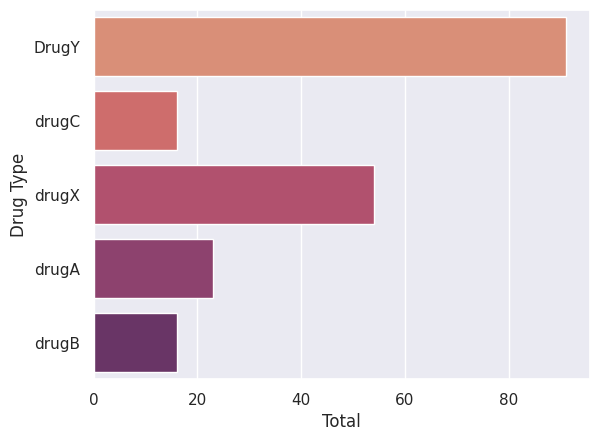

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=df_drug, palette="flare")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

/tmp/ipython-input-2194788640.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=df_drug, palette="rocket")


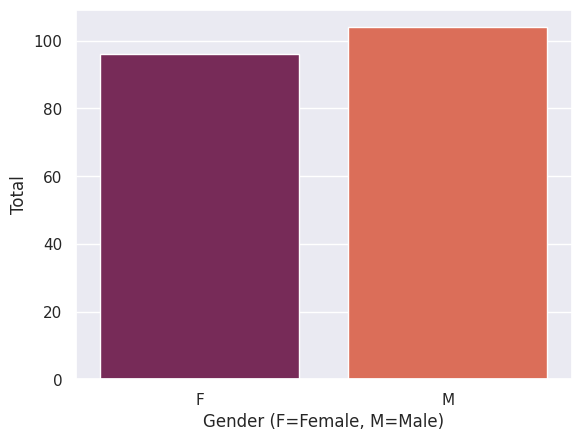

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Sex", data=df_drug, palette="rocket")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

/tmp/ipython-input-1128262631.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="BP", data=df_drug, palette="crest")


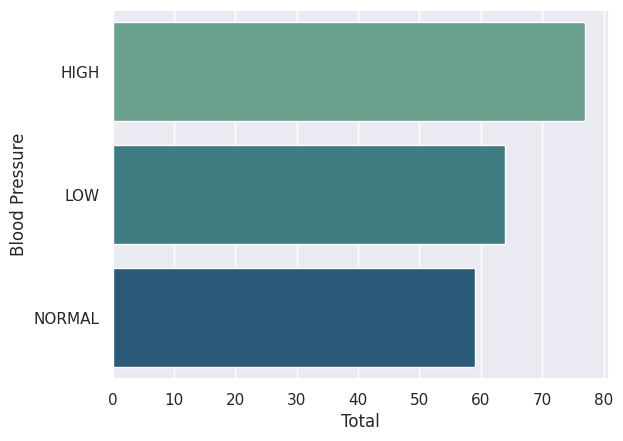

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y="BP", data=df_drug, palette="crest")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()

/tmp/ipython-input-1765864321.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cholesterol", data=df_drug, palette="magma")


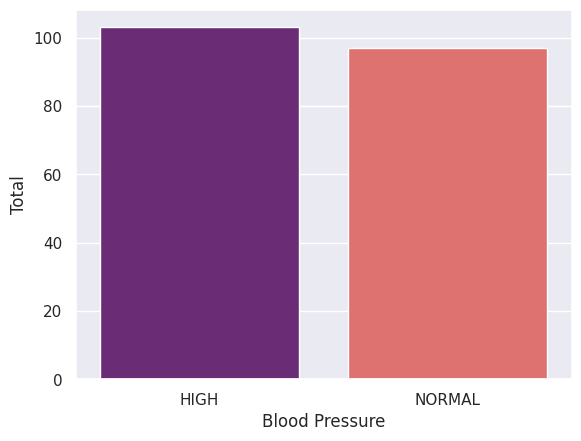

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Cholesterol", data=df_drug, palette="magma")
plt.xlabel('Blood Pressure')
plt.ylabel('Total')
plt.show()

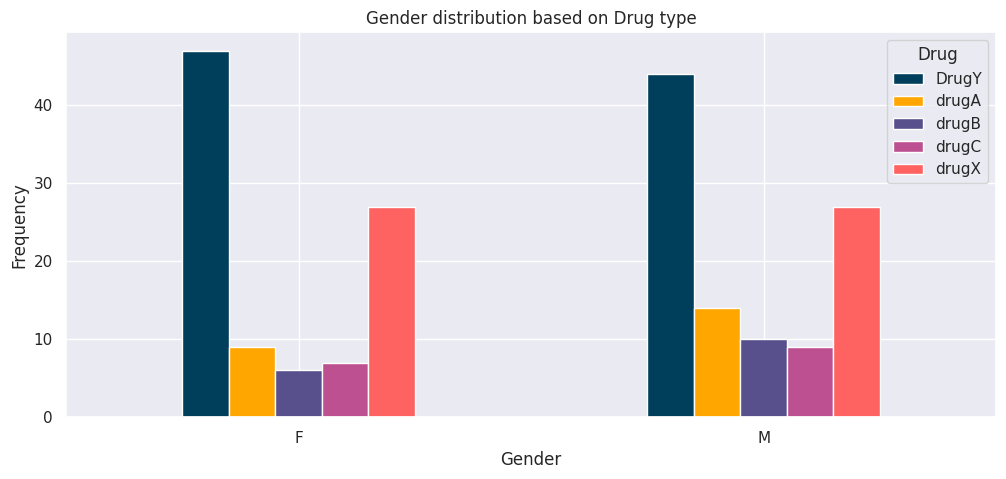

In [ ]:
pd.crosstab(df_drug.Sex,df_drug.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

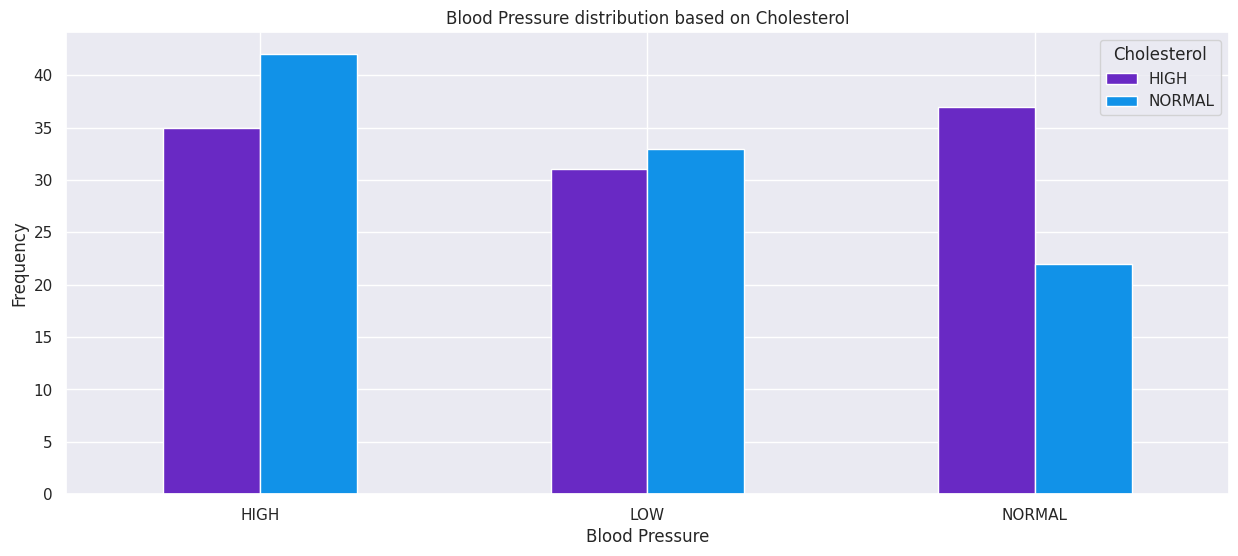

In [ ]:
pd.crosstab(df_drug.BP,df_drug.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

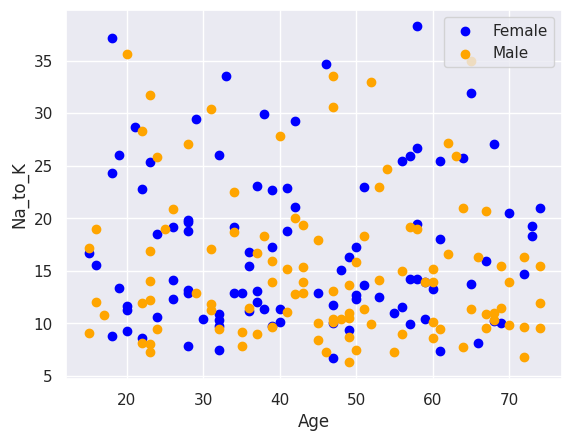

In [ ]:
plt.scatter(x=df_drug.Age[df_drug.Sex=='F'], y=df_drug.Na_to_K[(df_drug.Sex=='F')], c="Blue")
plt.scatter(x=df_drug.Age[df_drug.Sex=='M'], y=df_drug.Na_to_K[(df_drug.Sex=='M')], c="Orange")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

# **SELEKSI FITUR**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_temp = RandomForestClassifier(random_state=42)
rf_temp.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
importance = rf_temp.feature_importances_
features = X.columns

feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

feat_imp


,Feature,Importance
1,Na_to_K,0.533886
0,Age,0.142260
4,BP_NORMAL,0.123318
3,BP_LOW,0.107825
5,Cholesterol_NORMAL,0.077590
2,Sex_M,0.015121


# **Models**

**Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_leaf_nodes=20, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)


**Random Forest**

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_leaf_nodes=30,
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
SVCAcc = accuracy_score(y_test, y_pred_svm)


              precision    recall  f1-score   support

       DrugY       0.85      0.85      0.85        27
       drugA       1.00      0.86      0.92         7
       drugB       1.00      0.40      0.57         5
       drugC       1.00      1.00      1.00         5
       drugX       0.80      1.00      0.89        16

    accuracy                           0.87        60
   macro avg       0.93      0.82      0.85        60
weighted avg       0.88      0.87      0.86        60

[[23  0  0  0  4]
 [ 1  6  0  0  0]
 [ 3  0  2  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 16]]


In [ ]:
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
DTAcc = accuracy_score(y_test, y_pred_dt)


              precision    recall  f1-score   support

       DrugY       0.96      1.00      0.98        27
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.94      0.97        16

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60

[[27  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0  5  0]
 [ 1  0  0  0 15]]


In [ ]:
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
RFAcc = accuracy_score(y_test, y_pred_rf)


              precision    recall  f1-score   support

       DrugY       0.96      1.00      0.98        27
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.94      0.97        16

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60

[[27  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0  5  0]
 [ 1  0  0  0 15]]


# **Model Comparison**

In [ ]:
import pandas as pd

model_names = ['SVM', 'Decision Tree', 'Random Forest']
accuracies = [SVCAcc*100, DTAcc*100, RFAcc*100]

comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy (%)': accuracies
})

comparison_df = comparison_df.sort_values(by='Accuracy (%)', ascending=False)
comparison_df


,Model,Accuracy (%)
1,Decision Tree,98.333333
2,Random Forest,98.333333
0,SVM,86.666667
